In [1]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
# import seaborn as sns
import warnings
# warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 80
# plt.rcParams['axes.grid'] = True
# sns.set()

In [2]:
from synthesizer import Synthesizer
from generator import Generator
from algorithm import Algorithm

In [14]:
series_type = "default"

# Cоздание синтезатора, cпособного создавать workers_num наборов параметров, для каждого из которых генерировать временные ряды.
# Сигнал - случайный вектор из нормального распределения. Отклик - скалярное произведение сигнала на вектор весов плюс нормальный шум из N(0,1)
synt = Synthesizer(series_type, dim=10, low=-10, high=10, 
                   noise_var=1, workers_num=3, random_seed=177)

# Создание генератора данных, склеивающего разнородные временные ряды в один 
# В данном случае источник рядов - наш синтезатор
gen = Generator(series_type, synt)

# Получение итогового временного ряда путем получения от синтезатора pieces_num временных рядов 
# произвольного размера из [lower_bound, upper_bound) и их последующей склейки
gen.generate(pieces_num=10, lower_bound=100, upper_bound=400, alternating=True)

In [15]:
# gen.show_time_series()

In [16]:
# gen.draw_merged()

In [17]:
gen.launch()

# Cоздание объекта GMMP алгоритма, работающего total_time итераций
# Каждый эксперт представляет из себя LinReg модель, которая при инициализации тренируется на последних train_window точках
algo = Algorithm(series_type, gen, train_window=8, init_pretrained=False)

# Запуск алгоритма
algo.run()

100%|████████████████████████████████████████████████████████████████████████| 2681/2681 [01:11<00:00, 37.46it/s]


In [18]:
algo.a, algo.b

(-48.273272829876525, 63.12137688283517)

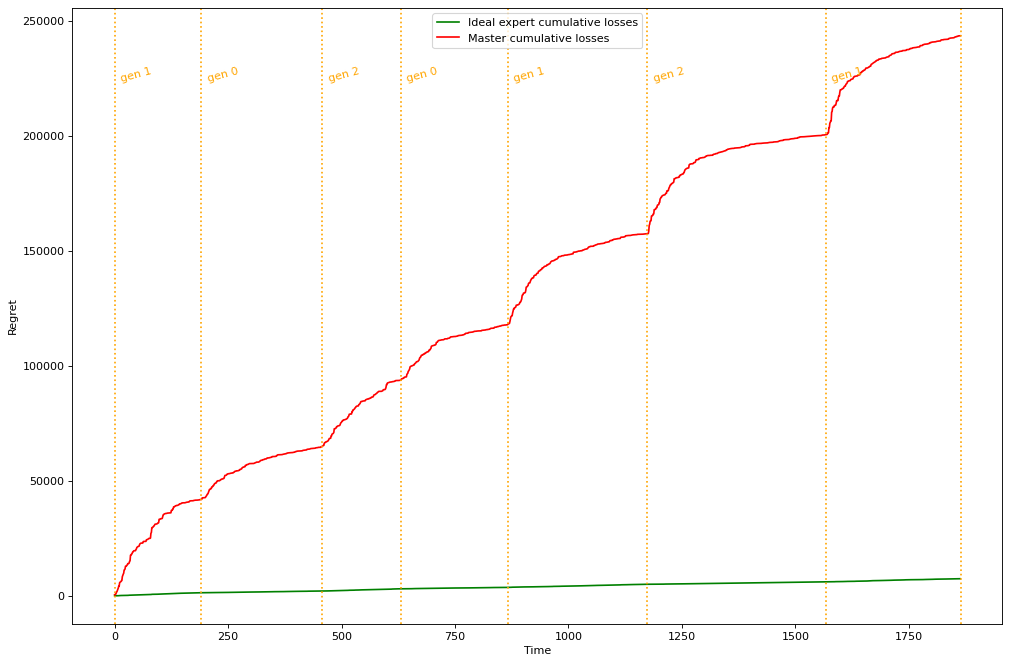

In [19]:
fig, axes = algo.draw_all(show=["master", "ideal"], show_experts=[], show_from_start=False,
                          show_axes=["regret"], height_ratios=[1], fig_size=(15, 10))
# fig.savefig("fig.png")